Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


1) Загрузите датасет taxi.csv.


In [2]:
data = pd.read_csv('taxi.csv')
data.head(5)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


2) Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


Вывод:

Пропущенных данных в датасете не обнаружено. Присутствует 2 переменные типа object, 6 переменных типа float64,
6 переменных типа int64

______________

3) Напишите в markdown свои наблюдения.

In [4]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


Вывод по датасету:

offer_gk - уникальный оффер, для модели полезности никакой не несет - можно удалить

weekday_key - день недели, создам отдельную переменную is_weekend (выходной) как правило в выходные дни поездки другого характера

hour_key - час дня, возможно стоит поделить на рабочее/нерабочее время - нужно еще подумать
driver_gk - ID водителя, возможно поможет прогнозировать резульатат, на осонове предпочтения по заказам которые водиель принимает

order_gk - номер заказа, может повторяться и может быть не выполнен

driver_latitude - широты водителя
driver_longitude - долгота водителя 
origin_order_latitude - широта заказа
origin_order_longitude - долгота заказа
Данные переменные помогут отпределить расстояние между водителем и клиентом, как правило если до клиента ехать долго то водитель не принимает заказ


distance_km - длина поездки в км
duration_min - время поездки
Полезные пременные,из анализа выше видно что данные могут быть незаполнены, возможно такие заказы следует удалить чтобы не снижать качество модели


offer_class_group - класс машины (эконом итд)
ride_type_desc - тип заказа
Эти две переменные нужно будет преобразовать в числа, для обучения модели


driver_response - водитель принял заказ(1 да, 0 нет), переменная для прогноза!

______

In [5]:
# поиск столбцов с уникальными значениями
for i in data.columns:
    if len(data[i].unique())==len(data):
        print('{} - unique'.format(i))
    else:
        print('{} - not unique'.format(i))

offer_gk - unique
weekday_key - not unique
hour_key - not unique
driver_gk - not unique
order_gk - not unique
driver_latitude - not unique
driver_longitude - not unique
origin_order_latitude - not unique
origin_order_longitude - not unique
distance_km - not unique
duration_min - not unique
offer_class_group - not unique
ride_type_desc - not unique
driver_response - not unique


In [6]:
# поиск кейсов когда заказ не был принят в первых раз
mult_orders = {}
for i in data.order_gk:
    if len(data[ data.order_gk==i])>1:
        mult_orders[i] = len(data[ data.order_gk==i])
        #print(i, len(data[ data.order_gk==i]))

________

4) Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

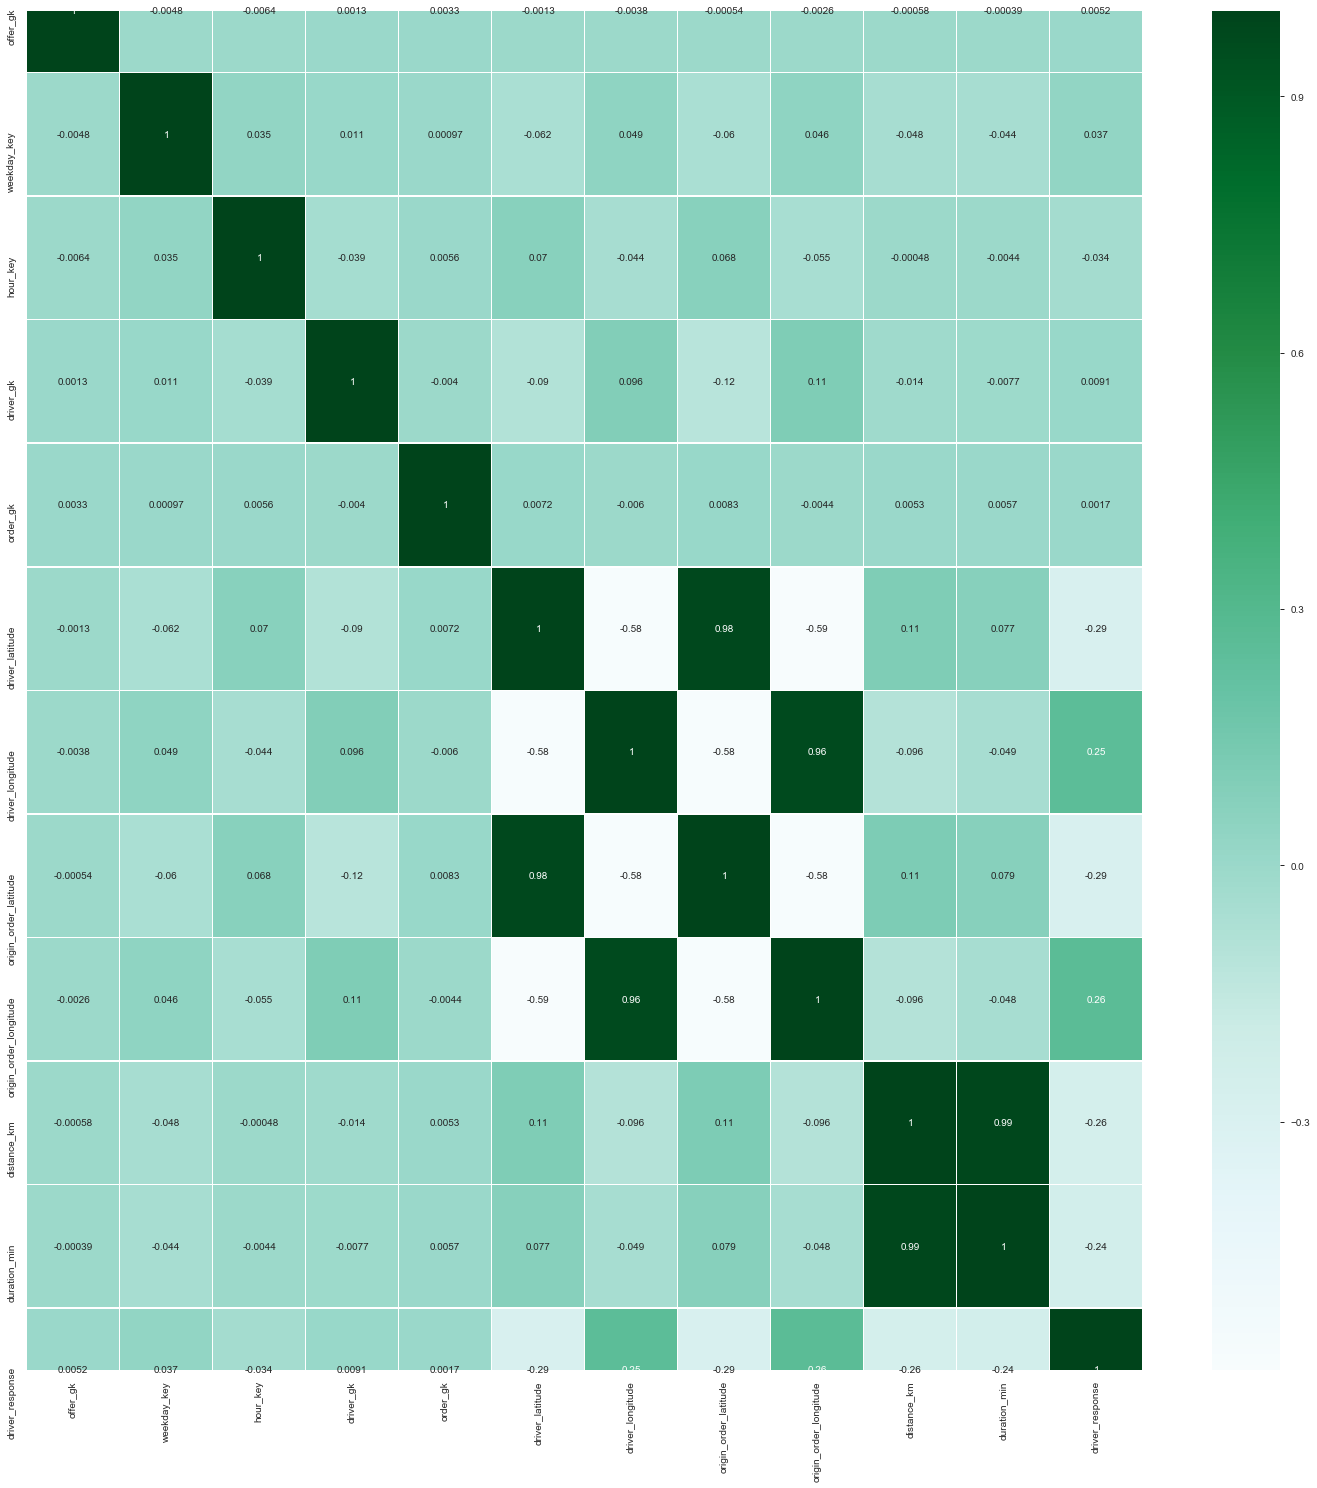

In [7]:
plt.figure(figsize=(25, 25))

sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=0.5, cmap='BuGn')
plt.show()

In [8]:
data.drop_duplicates().shape

(100000, 14)

In [ ]:
data.profile_report()

Вывод:
    
Целевой признак слабо коррелирует с другими переменными

Однако, можно заметить что сильную корреляцию между собой имеют такие признаки как:
Широта воителя и клиента, Долгота водителя и клиента
Обратную корреляцию имеют такие признаки как тип поездки Бизнес и частная, Стандратный и Эконом - что логично

___________________

5) Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

Буду использовать преобразования переменных OneHotEncoder, древо решений хорошо работает с этим кодировщиком.

In [9]:
# преобразуем некоторые качественные признаки в числа
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

In [10]:
enc_data = pd.DataFrame(enc.fit_transform(data[ ['offer_class_group','ride_type_desc'] ]).toarray())

new_column_names = enc.get_feature_names(['offer_class_group','ride_type_desc'])

enc_data.columns = new_column_names
enc_data.head()

,offer_class_group_Delivery,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_Test,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
data = data.join(enc_data)
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,...,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_Test,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
offer_gk                      100000 non-null int64
weekday_key                   100000 non-null int64
hour_key                      100000 non-null int64
driver_gk                     100000 non-null int64
order_gk                      100000 non-null int64
driver_latitude               100000 non-null float64
driver_longitude              100000 non-null float64
origin_order_latitude         100000 non-null float64
origin_order_longitude        100000 non-null float64
distance_km                   100000 non-null float64
duration_min                  100000 non-null float64
offer_class_group             100000 non-null object
ride_type_desc                100000 non-null object
driver_response               100000 non-null int64
offer_class_group_Delivery    100000 non-null float64
offer_class_group_Economy     100000 non-null float64
offer_class_group_Kids        100000 non

____________

6) Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

In [13]:
#удалим столбцы для которых создали отдельные признаки - ['offer_class_group','ride_type_desc']
data = data.drop(['offer_class_group','ride_type_desc'], axis=1)

In [14]:
# судя по кол-ву поездок по дням, выходные это номера 5 и 6 (сб и вскр)
data.groupby(data.weekday_key).count().hour_key

weekday_key
0    14411
1    13089
2    12859
3    11601
4    13290
5    19284
6    15466
Name: hour_key, dtype: int64

In [15]:
# добавим новую переменную is_weekend, и удалим weekday_key
data['is_weekend'] = [ 1 if x>=5 else 0 for x in data.weekday_key ]
data = data.drop('weekday_key', axis=1)

In [16]:
data

,offer_gk,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,...,offer_class_group_Standard,offer_class_group_Test,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private,is_weekend
0,1105373,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,759733,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,416977,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,889660,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1120055,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,726210,2,2442,27360,55.961246,37.413497,55.966694,37.415754,17.378,29.817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
99996,881472,1,2442,381960,55.961246,37.413497,55.964892,37.413543,7.751,12.683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
99997,626673,20,2442,627126,55.961315,37.413497,55.962203,37.416373,46.983,46.217,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
99998,672584,21,2442,140623,55.961354,37.413864,55.964892,37.413543,50.029,51.100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


Поиск пропусков и выбросов:
========

In [17]:
# none значений в датасете нет
data[ pd.isna(data) ].count()

offer_gk                      0
hour_key                      0
driver_gk                     0
order_gk                      0
driver_latitude               0
driver_longitude              0
origin_order_latitude         0
origin_order_longitude        0
distance_km                   0
duration_min                  0
driver_response               0
offer_class_group_Delivery    0
offer_class_group_Economy     0
offer_class_group_Kids        0
offer_class_group_Premium     0
offer_class_group_Standard    0
offer_class_group_Test        0
offer_class_group_VIP         0
offer_class_group_VIP+        0
offer_class_group_XL          0
ride_type_desc_SMB            0
ride_type_desc_affiliate      0
ride_type_desc_business       0
ride_type_desc_private        0
is_weekend                    0
dtype: int64

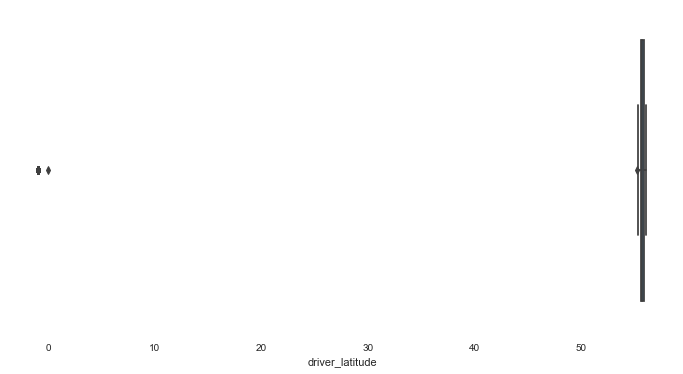

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['driver_latitude']) 

In [19]:
# удаление выбросов незначительно для датасета
len(data[ data.driver_latitude < 55])

141

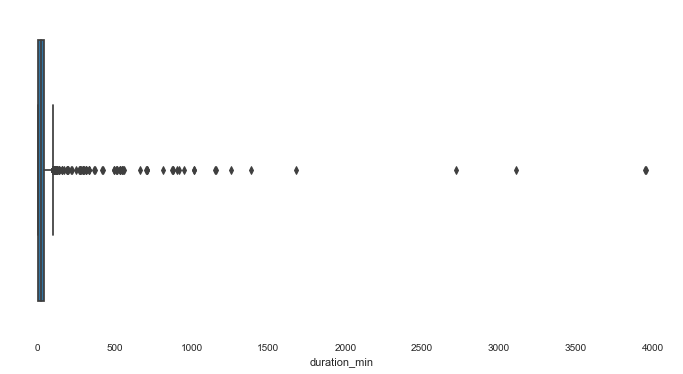

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['duration_min']) 

In [21]:
#удалим выбросы
# сделал два варианта модели, с включеным фильтром на distance_km и duration_min
# так как в этих признаках много пропущенных значений (стоит -1)
# если не делать фильтр на эти два признака то точность модели остается примерно прежней
data = data[ 
             (data['distance_km']>0) & 
             (data['distance_km']<=200) & 
             (data['duration_min']>1) & 
             (data['duration_min']<=200) &
             (data['driver_latitude']>50) &
             (data['origin_order_latitude']>1)
           ].reset_index(drop=True)
data.describe()

,offer_gk,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,...,offer_class_group_Standard,offer_class_group_Test,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private,is_weekend
count,7.350600e+04,73506.000000,73506.000000,73506.000000,73506.000000,73506.000000,73506.000000,73506.000000,73506.000000,73506.000000,...,73506.000000,73506.0,73506.000000,73506.000000,73506.000000,73506.000000,73506.0,73506.000000,73506.000000,73506.000000
mean,5.657876e+05,13.804737,3461.093217,461941.736539,55.780906,37.546340,55.780252,37.545998,24.489989,31.149146,...,0.405314,0.0,0.001428,0.000150,0.006000,0.000258,0.0,0.002068,0.997674,0.353005
std,3.263003e+05,7.314647,2039.235159,266114.741395,0.157264,0.160196,0.159527,0.162986,19.693556,17.703329,...,0.490956,0.0,0.037768,0.012232,0.077224,0.016075,0.0,0.045427,0.048176,0.477908
min,4.000000e+00,0.000000,14.000000,27.000000,55.367720,36.984771,55.342523,36.994072,0.046000,1.067000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.848508e+05,8.000000,1421.000000,230547.500000,55.705867,37.413468,55.705657,37.407117,7.963250,16.617000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
50%,5.648435e+05,16.000000,3507.000000,463095.000000,55.774868,37.528206,55.775064,37.527110,18.645000,28.200000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
75%,8.496385e+05,20.000000,5246.000000,692512.000000,55.961104,37.625501,55.962322,37.625288,38.728000,44.333000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,1.130355e+06,23.000000,6806.000000,920344.000000,56.018542,38.232760,56.025061,38.204119,180.045000,157.100000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [22]:
# скорее всего переменные test стоит удалить
# также удалим ненужный столбец offer_gk, так как это уникальный столбец с номером заявки
data = data[ data['offer_class_group_Test']!=1 ]
data.drop(['offer_class_group_Test', 'offer_gk'], axis=1)

,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,...,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private,is_weekend
0,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73501,2,2442,27360,55.961246,37.413497,55.966694,37.415754,17.378,29.817,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
73502,1,2442,381960,55.961246,37.413497,55.964892,37.413543,7.751,12.683,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
73503,20,2442,627126,55.961315,37.413497,55.962203,37.416373,46.983,46.217,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
73504,21,2442,140623,55.961354,37.413864,55.964892,37.413543,50.029,51.100,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


________

7) Разделите выборку на обучаемую и тестовую

RandomForestClassifier:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [38]:

X = data.drop(['driver_response'], axis=1)    
Y = data['driver_response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [39]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((58804, 24), (14702, 24), (58804,), (14702,))

8) Обучите модель. Напишите в markdown свои наблюдения по полученным результатам.

In [40]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
clf.score(X_test, Y_test)

0.8024758536253571

Тоность модели около 80%

Попробуем xgboost
=========

Для начала установим его через Anaconda_navigator

In [43]:
import xgboost
from sklearn.metrics import roc_auc_score

In [46]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
y_train_predict = xgb.predict_proba(X_train)[:, 1]
y_test_predict = xgb.predict_proba(X_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(Y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(Y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.89
Test:  0.87


In [48]:
xgb.score(X_test, Y_test)

0.7981907223507005

Вывод:

Методы RandomForest и XGBoost показывают примерно одинаковые результаты

До этого XGBoost никогда не использовал, буду изучать его дальше

In [34]:
?xgb